###importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### reading data using pandas library

In [ ]:
data  = pd.read_excel('DEFAULT.xlsx')
data.head()

,tot_earning_mem,hh_size,operated_land,land,bank_account,postoff_acc,remittance,kissan_cc_card,no_of_transport_eq,transport_eq_val,govtbond,mutual_fund,gold,agmachinery,nonagmachine,alcohol,tb,avg_edu_exp,avg_pc_health_exp,avg_agri_inc,avg_wage_inc,avg_inc_livestock,avg_nonfarm_inc,avg_cons,age,h1,h2,h3,h4,h5,h6,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,avg_loanamt,default
0,2,3,2,0.000,1,2,1,2,2,500000,1250,0,35600,750,0,0,1,13602.97,3867.885,78966.62,9347.981,6264.89,572.0642,5603.624,27,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,40000,1
1,2,4,1,2.486,1,1,2,2,2,2000,5700,7200,45000,25000,0,0,1,13602.97,3867.885,78966.62,9347.981,6264.89,572.0642,5603.624,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,88400,1
2,1,4,1,3.229,1,2,1,2,2,131000,750,0,195800,1050,0,0,1,13602.97,3867.885,78966.62,9347.981,6264.89,572.0642,5603.624,44,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,145000,1
3,1,2,1,0.404,1,2,2,2,2,600,3600,3600,0,0,0,0,1,13602.97,3867.885,78966.62,9347.981,6264.89,572.0642,5603.624,46,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,10000,1
4,1,3,1,0.808,2,2,2,2,2,600,1000,6950,20000,125,0,0,1,13602.97,3867.885,78966.62,9347.981,6264.89,572.0642,5603.624,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,15000,0


In [ ]:
data.shape

(39542, 45)

In [ ]:
data.describe()

,tot_earning_mem,hh_size,operated_land,land,bank_account,postoff_acc,remittance,kissan_cc_card,no_of_transport_eq,transport_eq_val,govtbond,mutual_fund,gold,agmachinery,nonagmachine,alcohol,tb,avg_edu_exp,avg_pc_health_exp,avg_agri_inc,avg_wage_inc,avg_inc_livestock,avg_nonfarm_inc,avg_cons,age,h1,h2,h3,h4,h5,h6,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,avg_loanamt,default
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,3.954200e+04,3.954200e+04,39542.000000,3.954200e+04,3.954200e+04,3.954200e+04,39542.00000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,3.954200e+04,39542.000000
mean,2.067650,5.007688,1.273355,0.753929,1.209828,1.847479,1.895655,1.849249,1.518638,7.327892e+04,1.594573e+03,335.829118,4.504360e+04,7.085247e+03,3.401278e+03,0.69167,0.264504,12633.989071,3649.632453,88917.511369,14455.284690,1166.157413,760.210699,7124.647836,39.591725,0.501012,0.115270,0.116003,0.121263,0.117268,0.029184,0.074478,0.000961,0.000278,0.001492,0.089904,0.117091,0.229882,0.196728,0.164711,0.014542,0.087502,0.022432,5.634090e+04,0.496055
std,1.249203,2.316139,0.445687,1.463147,0.407191,0.359530,0.305711,0.357811,1.199544,3.395020e+05,4.467900e+04,2289.008613,1.008293e+05,5.214715e+04,6.196728e+04,0.46181,0.441074,7128.000524,2319.228855,82827.354369,11175.264464,2162.829012,1180.613372,2605.468310,9.368839,0.500005,0.319351,0.320233,0.326437,0.321743,0.168325,0.262550,0.030986,0.016677,0.038599,0.286048,0.321532,0.420762,0.397530,0.370924,0.119710,0.282573,0.148085,1.327409e+05,0.499991
min,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,190.000000,204.302700,2161.250000,0.000000,0.000000,0.000000,2081.250000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02,0.000000
25%,1.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.000000e+03,0.000000e+00,0.000000e+00,0.00000,0.000000,7306.548000,2209.442000,36033.830000,7272.513000,309.225800,120.833300,5480.833000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000
50%,2.000000,5.000000,1.000000,0.314000,1.000000,2.000000,2.000000,2.000000,2.000000,2.200000e+03,0.000000e+00,0.000000,1.800000e+04,6.000000e+02,0.000000e+00,1.00000,0.000000,11421.930000,3196.637000,63821.440000,11479.850000,726.955400,368.454600,6660.417000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.070700e+04,0.000000
75%,3.000000,6.000000,2.000000,0.846000,1.000000,2.000000,2.000000,2.000000,2.000000,2.600000e+04,0.000000e+00,0.000000,5.000000e+04,2.800000e+03,0.000000e+00,1.00000,1.000000,16567.630000,4596.358000,110027.300000,18327.680000,1320.391000,960.227300,7935.938000,44.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,1.000000
max,12.000000,38.000000,2.000000,30.009000,2.000000,2.000000,2.000000,2.000000,7.000000,2.810000e+07,7.500000e+06,158400.000000,8.535000e+06,7.700000e+06,8.175000e+06,1.00000,1.000000,42844.090000,27472.550000,749623.700000,93375.000000,45448.750000,11296.880000,23602.000000,89.000000,1.000000,1.000000,1.000000

### checking any null values present or not. so calling info function

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39542 entries, 0 to 39541
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tot_earning_mem     39542 non-null  int64  
 1   hh_size             39542 non-null  int64  
 2   operated_land       39542 non-null  int64  
 3   land                39542 non-null  float64
 4   bank_account        39542 non-null  int64  
 5   postoff_acc         39542 non-null  int64  
 6   remittance          39542 non-null  int64  
 7   kissan_cc_card      39542 non-null  int64  
 8   no_of_transport_eq  39542 non-null  int64  
 9   transport_eq_val    39542 non-null  int64  
 10  govtbond            39542 non-null  int64  
 11  mutual_fund         39542 non-null  int64  
 12  gold                39542 non-null  int64  
 13  agmachinery         39542 non-null  int64  
 14  nonagmachine        39542 non-null  int64  
 15  alcohol             39542 non-null  int64  
 16  tb  

##1.visualization using seaborn library so calling heatmap. 

##2.understanding correlation between the input variables

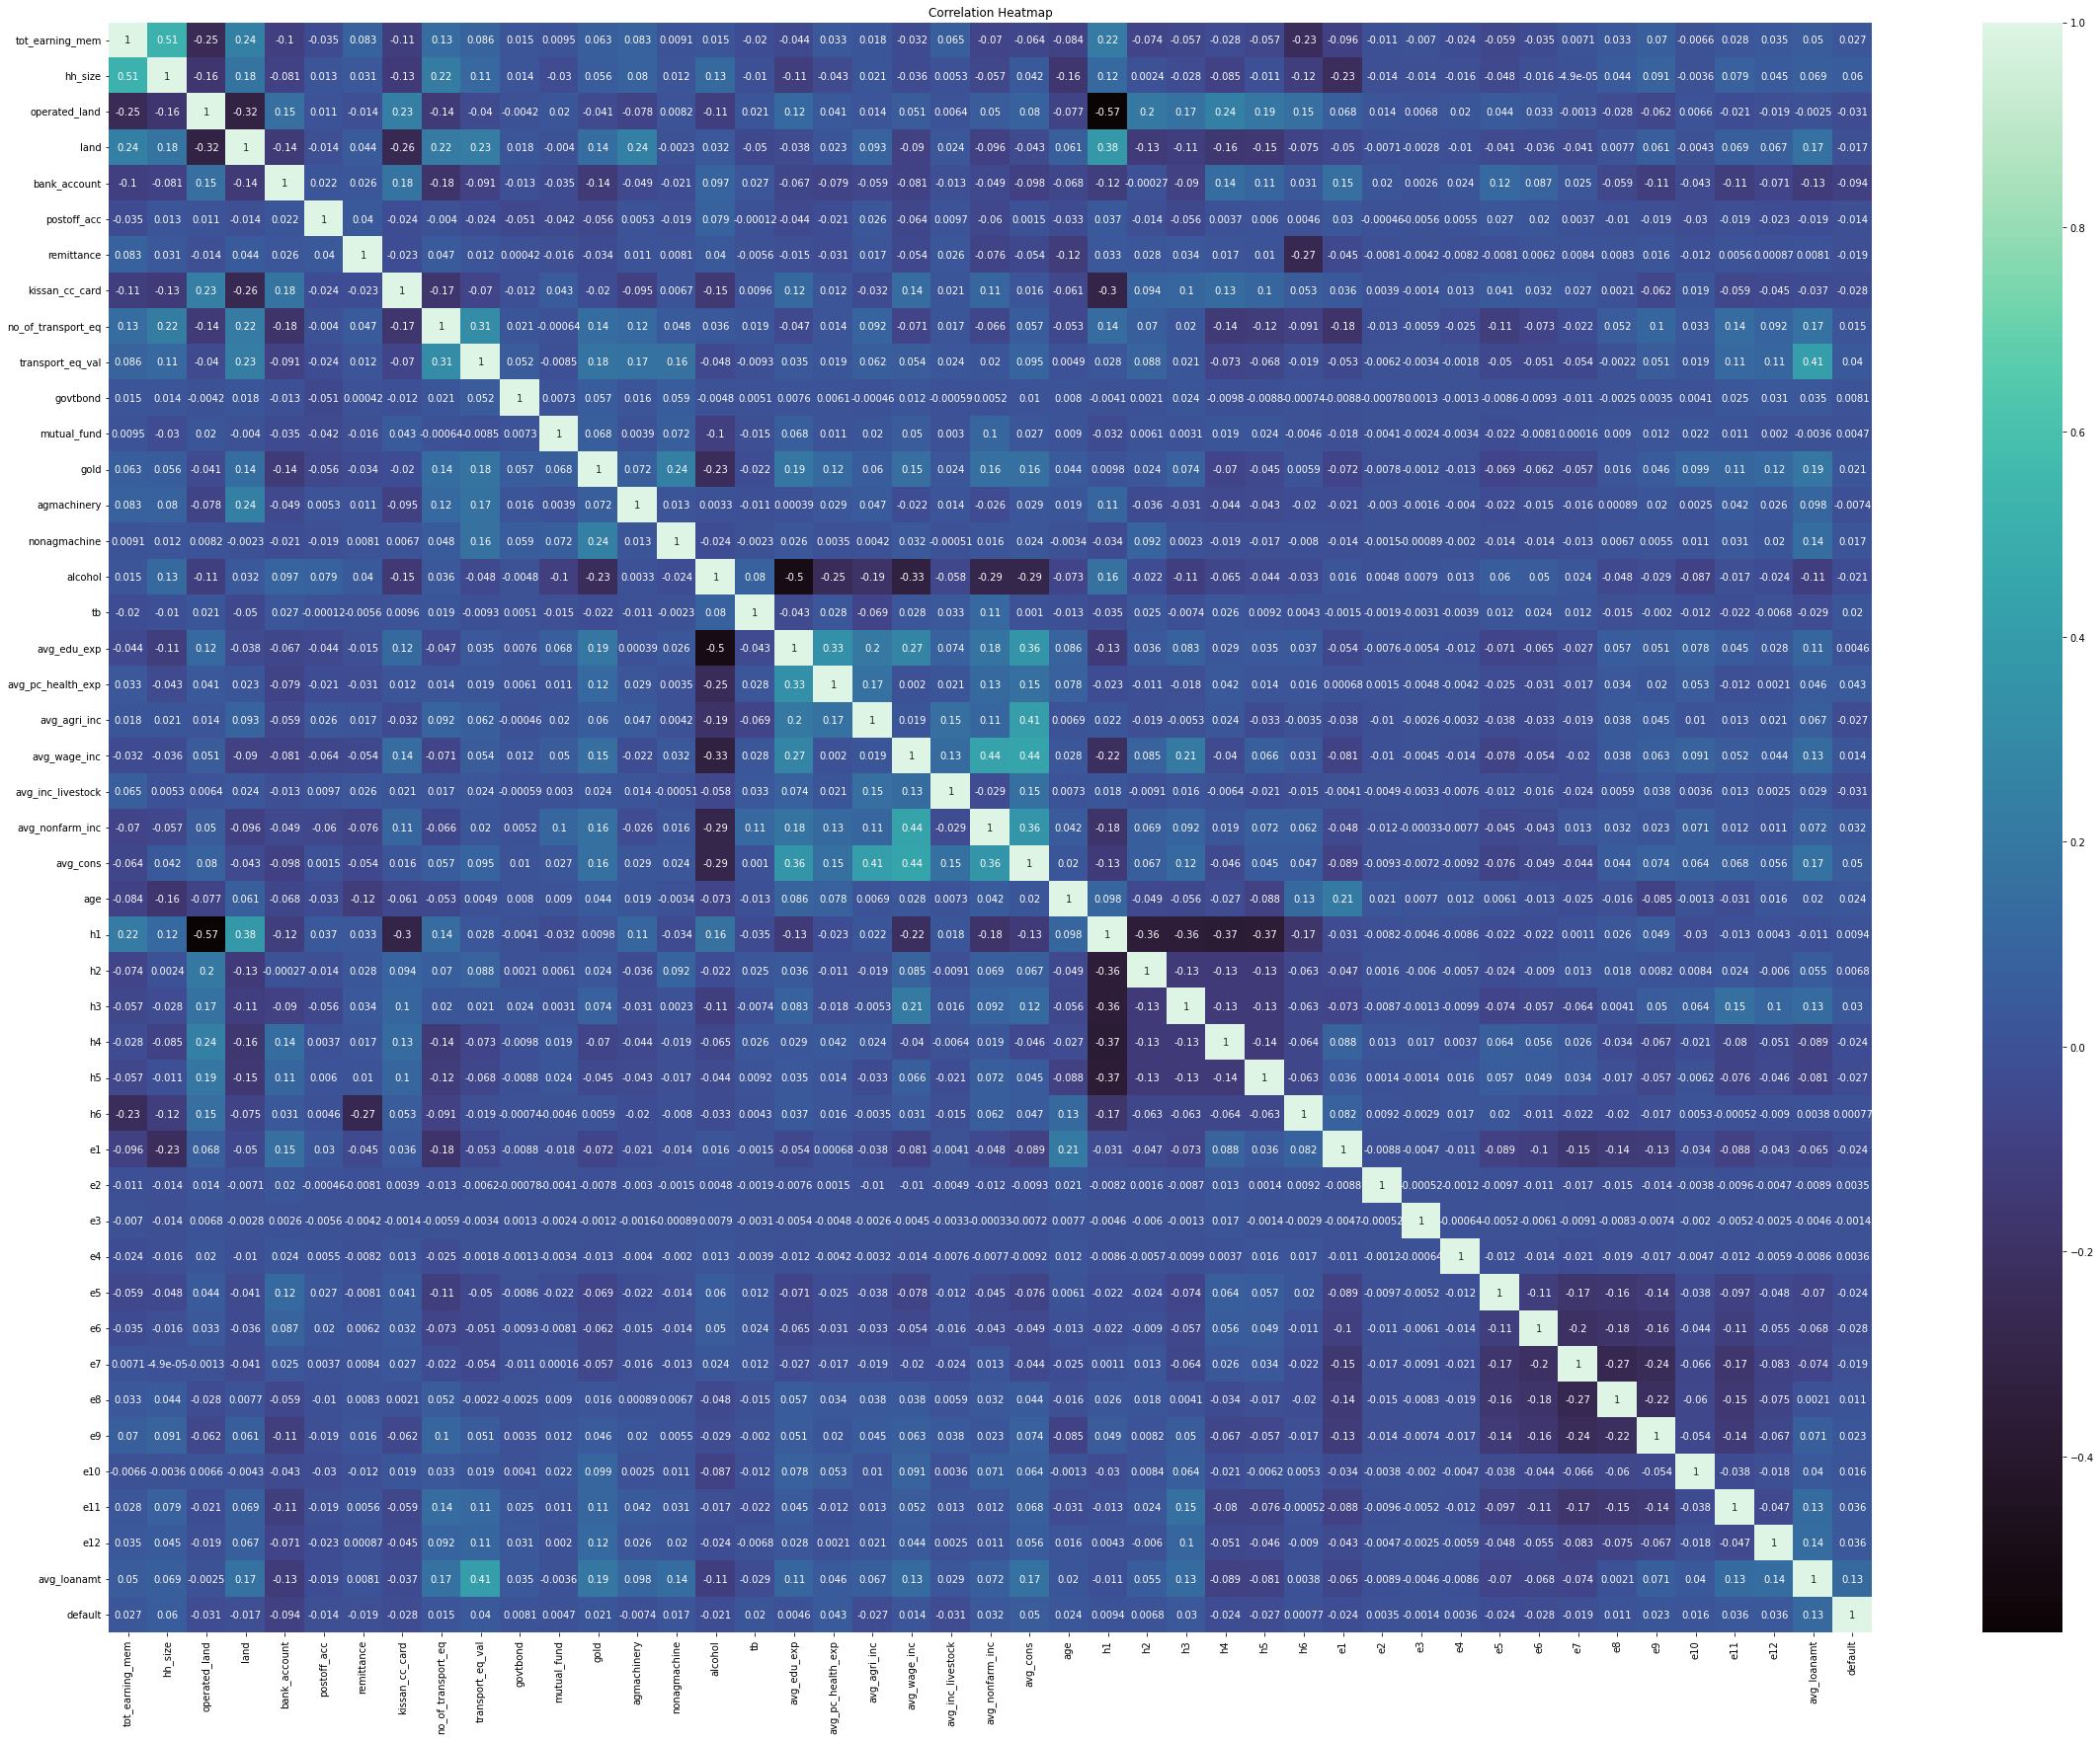

In [ ]:
corr = data.corr()
plt.figure(figsize=(40,30))
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

##3.here light shades and dark shades indicates the positve correlation and negative correlation between the variables.
##4.color intensity indicates the intensity of realtion between the variables

#preprocessing

###Assinging all variables which are used to predict deafult defined with x
### and the output variable deafult assigned to y

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### so x has shaped all rows and 44 columns i.e, except default column 

In [ ]:
x.shape

(39542, 44)

###and y shaped with all rows and one column.

In [ ]:
y.shape

(39542,)

### printing x and y matrix respectively

In [ ]:
x

array([[2.00e+00, 3.00e+00, 2.00e+00, ..., 0.00e+00, 0.00e+00, 4.00e+04],
       [2.00e+00, 4.00e+00, 1.00e+00, ..., 1.00e+00, 0.00e+00, 8.84e+04],
       [1.00e+00, 4.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 1.45e+05],
       ...,
       [2.00e+00, 5.00e+00, 2.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+04],
       [4.00e+00, 5.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 3.00e+04],
       [2.00e+00, 9.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+04]])

In [ ]:
print([y])

[array([1, 1, 1, ..., 0, 0, 0])]


In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


##Now splitting data into 1/4 th for testing data and 3/4 for training data, so called train test split model from sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test1 = train_test_split(x,y,test_size = 0.25,random_state = 0)
x_train,x_test,y_train,y_test2 = train_test_split(x,y,test_size = 0.25,random_state = 0)
x_train,x_test,y_train,y_test3 = train_test_split(x,y,test_size = 0.25,random_state = 0)

##Now normalizing data using standard scaler model, so data cannot be biassed from larger values w.r.t smaller digit values.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
x_train.shape

(29656, 44)

In [ ]:
x_test.shape

(9886, 44)

###normalized values of trained data

In [ ]:
print(x_train)

[[ 0.74399825 -0.00664447 -0.61023859 ... -0.31116987 -0.15087001
   1.20531979]
 [-0.85890856 -0.43782282 -0.61023859 ... -0.31116987 -0.15087001
  -0.45768254]
 [ 1.54545166  1.28689056  1.63870332 ...  3.21367875 -0.15087001
   4.54753418]
 ...
 [-0.85890856 -0.00664447 -0.61023859 ... -0.31116987 -0.15087001
  -0.02712177]
 [-0.85890856 -0.00664447 -0.61023859 ... -0.31116987  6.62822249
   2.45865018]
 [-0.05745515 -0.86900116 -0.61023859 ... -0.31116987 -0.15087001
  -0.28475636]]


In [ ]:
y_train.shape

(29656, 1)

##values of y i.e; our output represented in array

In [ ]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

# 1. training XG Boost model on the training set so that it will boost performance of training. And yield high accuracy in resulting values.

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##Now training with different classification models.

##1. random forest classifier

#### using ensemble method from random forest, and using no. of trees as 100, and criterion entropy parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1  = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### from classifier1 objective, I am  calling predict method and prediting using x_test and concatenating both results such as y_test and y_predict in to one matrix with one column. so we can see side by side the output values.

### y_pred, y_test results

In [ ]:
y_pred1 = classifier1.predict(x_test)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[1 0]
 [1 1]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


###making confusion matrix using metrix method for y_test and y_pred values

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 =  confusion_matrix(y_test1,y_pred1)
print(cm1)


[[1983 2980]
 [ 826 4097]]


###Now calculating accuracy score of the same mentioned above.

In [ ]:
ac1 = accuracy_score(y_test1, y_pred1)*100
ac1

61.501112684604486

##2.Decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier2 = classifier2.fit(x_train, y_train)

In [ ]:
y_pred2 = classifier1.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[1 0]
 [1 1]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


### y_pred, y_test results

In [ ]:
y_pred2 = classifier2.predict(x_test)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[1 0]
 [1 1]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


### accuracy score for decision tree

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 =  confusion_matrix(y_test2,y_pred2)
print(cm2)

[[2216 2747]
 [1829 3094]]


In [ ]:
ac2 = accuracy_score(y_test2, y_pred2)*100
ac2

53.71232045316609

#Cross validation model

## Now using cross validation model, and using cross value =10 , so it prepares x_train data into 10 sets and validaitating respectively.
## so the result will be more accurate as we divided train data and tested.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(classifier1,x_train,y_train,cv =10)
print('accuracy : {:.2f}%'.format(accuracies1.mean()*100))
print('std:{:.3f}%'.format(accuracies1.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

accuracy : 65.73%
std:0.822%


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(classifier2,x_train,y_train,cv =10)
print('accuracy : {:.2f}%'.format(accuracies2.mean()*100))
print('std:{:.3f}%'.format(accuracies2.std()*100))

accuracy : 58.66%
std:0.515%


## 3. using ANN model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import time

###Now fitting ANN model with data

##using add method from sequential to call dense , dropout. 

In [ ]:
classifier3 = Sequential()

### adding drop function to avoid overfitting

In [ ]:
classifier3.add(Dropout(rate=0.1)) 

###1st hidden layer

In [ ]:
classifier3.add(Dense(activation="relu", kernel_initializer="uniform", units =10))

###2nd hidden layer

In [ ]:
classifier3.add(Dense(activation="relu", kernel_initializer="uniform", units=10)) 

##output layer

###1.using activation function sigmoid, because it will allows predctions probability in binary


###2.output layer used only units= 1 ,because our output is only binary i.e 0 or 1 
### if output has more than 2 classes we can use no. of output neurons more than 1 

In [ ]:
classifier3.add(Dense(activation="sigmoid", kernel_initializer="uniform", units=1))

## here we use 3 parameters,
1. here I am using no. of iterations 100.
<br>
<br>
2. using Adam optimizer beacuse it performs stochastic gradient descent, i.e,
<br>
<br>
updates weights, reduce loss function in same batch while predicting.
<br>
<br>
3. here we are predicting binary class so using binary_crossentropy
<br>
<br>
4. here also using accuracy from metrics list

4. using batch_size number is around 32. so it will compare predictions batches in less time.

In [ ]:
classifier3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier3.fit(x_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6722 - accuracy: 0.5806
Epoch 2/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6620 - accuracy: 0.5995
Epoch 3/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6588 - accuracy: 0.6070
Epoch 4/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6573 - accuracy: 0.6080
Epoch 5/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6549 - accuracy: 0.6123
Epoch 6/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6536 - accuracy: 0.6164
Epoch 7/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6514 - accuracy: 0.6194
Epoch 8/100
2966/2966 [==============================] - 10s 3ms/step - loss: 0.6511 - accuracy: 0.6188
Epoch 9/100
2966/2966 [==============================] - 9s 3ms/step - loss: 0.6509 - accuracy: 0.6181
Epoch 10/100
2966/2966 [==============================] - 10s 3ms

###predicting from x_test

In [ ]:
y_pred3 = classifier3.predict(x_test)
y_pred3

array([[0.57825994],
       [0.71034443],
       [0.6053482 ],
       ...,
       [0.5888429 ],
       [0.61252254],
       [0.4820733 ]], dtype=float32)

In [ ]:
y_pred3.shape

(9886, 1)

###Acuuracy score 

In [ ]:
accuracy_score(y_test3, np.round(abs(y_pred3)))*100 

58.04167509609549

### confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test3,np.round(abs(y_pred3)))
cm3

array([[1657, 3306],
       [ 842, 4081]])

#Now checking Dominance of classification curves by precision-recall curves

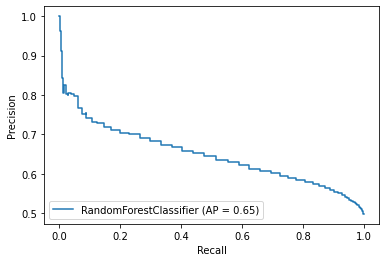

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(classifier1,x_test,y_test1)

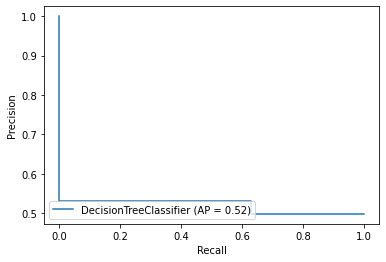

In [ ]:
plot_precision_recall_curve(classifier2,x_test,y_test2)

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.64)
ann_bin =binarizer.fit_transform((y_pred3))
ann_bin

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
plot_precision_recall_curve(classifier3,x_test,ann_bin)

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report
cr1 =classification_report(y_test1,y_pred1)
np.array((cr1))

array('              precision    recall  f1-score   support\n\n           0       0.71      0.40      0.51      4963\n           1       0.58      0.83      0.68      4923\n\n    accuracy                           0.62      9886\n   macro avg       0.64      0.62      0.60      9886\nweighted avg       0.64      0.62      0.60      9886\n',
      dtype='<U326')

In [ ]:
from sklearn.metrics import classification_report
cr2 =classification_report(y_test2,y_pred2)
np.array((cr2))

array('              precision    recall  f1-score   support\n\n           0       0.55      0.45      0.49      4963\n           1       0.53      0.63      0.57      4923\n\n    accuracy                           0.54      9886\n   macro avg       0.54      0.54      0.53      9886\nweighted avg       0.54      0.54      0.53      9886\n',
      dtype='<U326')

In [ ]:
from sklearn.metrics import classification_report
cr3 =classification_report(y_test3,np.round(abs(y_pred3)))
np.array((cr3))

array('              precision    recall  f1-score   support\n\n           0       0.66      0.33      0.44      4963\n           1       0.55      0.83      0.66      4923\n\n    accuracy                           0.58      9886\n   macro avg       0.61      0.58      0.55      9886\nweighted avg       0.61      0.58      0.55      9886\n',
      dtype='<U326')

#Now plotting roc curve

##$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

##$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

###ROC is the receiver operating characteristic 
###AUROC is the area under the ROC curve

####rf = randomforest,
####dt = decision tree,
####ann=neural network

### calling roc_curve class and creating objects respectively as per given nomenclature for y_test and y_pred for 1,2,3 defined earlier

In [ ]:
rf_auc = roc_auc_score(y_test1, y_pred1)
dt_auc = roc_auc_score(y_test2, y_pred2)
ann_auc = roc_auc_score(y_test3, y_pred3)

###printing the area under roc curve for given classification, respectively.

In [ ]:
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('ANN: AUROC = %.3f' % (ann_auc))

Random Forest: AUROC = 0.616
Decision Tree: AUROC = 0.537
ANN: AUROC = 0.640


##Now creating objects for False positives rate and True positive rate for function class roc_curve. respectively for 3 classification models used. 

In [ ]:
rf_fpr, rf_tpr, _ = roc_curve(y_test1, y_pred1)
dt_fpr, dt_tpr, _ = roc_curve(y_test2, y_pred2)
ann_fpr, ann_tpr, _ = roc_curve(y_test3, y_pred3)

### Plotting roc curve on axis x= false positive rate on x-axis
###                             y= true positive rate on y-axis
### for 3 classifiers rf = random foresrt
###                    dt = decision tree
###                     ann = neural network 

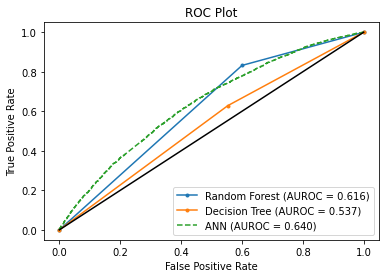

In [ ]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(ann_fpr, ann_tpr, linestyle='--', label='ANN (AUROC = %0.3f)' % ann_auc)
plt.plot([0,1],[0,1],c='k')# line passes through origin having slope =1, threshold = 0.5

plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 
plt.show()

#Conclusion

###As we see the above plot(graph) contains 3 curves rf,dt,ann.From the curve we can say that,
<br>

###1.for random forest auroc score = 0.616,and Higher the auc score higher will be the power of seperation between classes. 

###2.plotting curve which says the line leans more towards y-axis than any other curve, indicates, by random forest classification the rate of true positive is more, and also this curve has above average false positive rate  which type-1 error not more dangerous than type-2 error.

<br>

###3.This tells 61.6% the model can distinguish between the people who are defaulted or not.

###4. the random forest curve has false positive rate is higher, indicates the people who are elgible for the loan to be sanctioned, but failed to get loan. As they were indicated as default by the model.